In [1]:
from gsd_lib import GSD, MinimalPackingGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
def unique_random_sorted(size, low=0.0, high=1.0):
    """Ensure array has unique values, regenerating if needed."""
    rng = np.random.default_rng()
    x = low + rng.random(size)**2 * (high - low)
    if len(np.unique(x)) < size:
        return unique_random_sorted(size, low, high)
    return np.sort(x)


In [ ]:

d_max_d_min = []
m_max_m_min = []
norm_s = []
q_ns = []
errorses = []
iterations = []

sieves = 15
rng = np.random.default_rng()

for i in range(10000):
    # Example usage similar to the original main function
    
    # d = unique_random_sorted(sieves, 0.075, 75)
    d = np.array([0.00075,0.075, 0.15, 0.3, 0.6, 1.18, 2.36, 4.75, 9.5, 19, 25, 37.5, 50, 63, 75])
    
    mass = (101 - 1) * rng.random(sieves) + 1
    mass[-1] = 0.0  # Ensure last mass is zero
    # mass = [6.93546639, 12.49031735, 9.29866496, 8.61983351, 0.0]

    # Create GSD
    g = GSD(sizes=d, masses=mass)

    # Create minimal packing generator
    sgen = MinimalPackingGenerator(g)
    s = sgen.mps

    d_max_d_min.append(s.sizes[-1] / s.sizes[0])
    m_max_m_min.append(s.total_masses[-1] / s.total_masses[0])
    norm_s.append(np.sum(s.quantities))
    q_ns.append(s.quantities[-1])
    errorses.append(sgen.errors)
    iterations.append(sgen._iteration)

d_max_d_min = np.array(d_max_d_min)
m_max_m_min = np.array(m_max_m_min)
norm_s = np.array(norm_s)
q_ns = np.array(q_ns)
# errorses = np.array(errorses)
iterations = np.array(iterations)


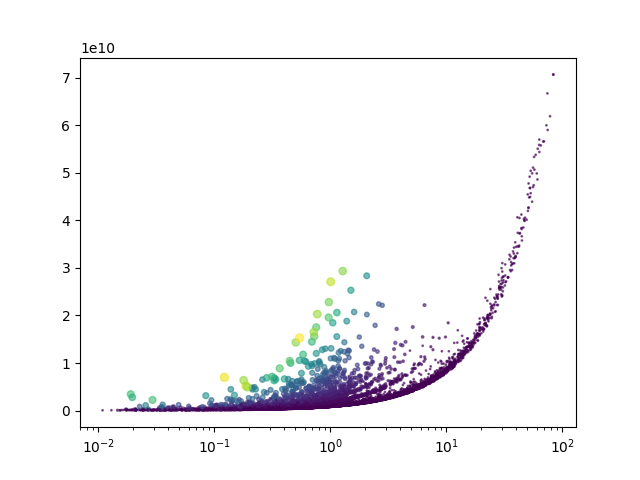

In [84]:
fig, ax = plt.subplots()

sc = ax.scatter(1/m_max_m_min, norm_s, c=q_ns, s=q_ns, cmap="viridis", alpha=0.6)
# sc = ax.scatter(m_max_m_min, iterations, c=q_ns, s=q_ns, cmap="viridis", alpha=0.6)
ax.set_xscale('log')
# ax.set_yscale('log')

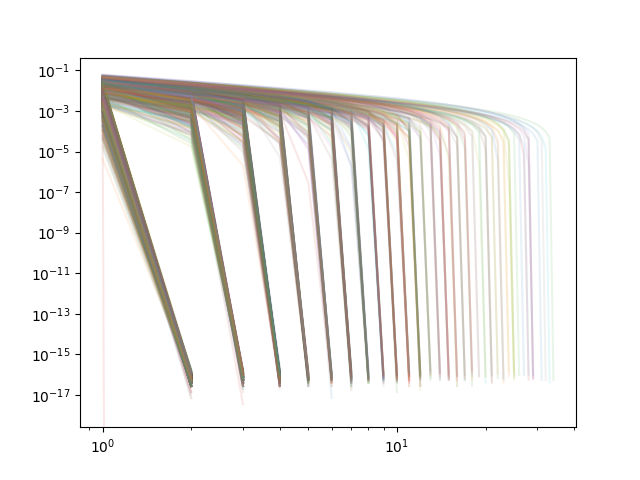

In [86]:
fig, ax = plt.subplots()

for i, error in enumerate(errorses):
    # print(error)
    # print(i)
    try:
        # ax.scatter(np.linspace(1, iterations[i], iterations[i]), np.max(error, axis=1), alpha=0.05, c="k")
        ax.plot(
            np.linspace(1, iterations[i], iterations[i]),
            np.max(error, axis=1),
            alpha=0.1,
        )
    finally:
        continue
# sc = ax.scatter(d_max_d_min, norm_s, c=q_ns, s=q_ns, cmap="viridis", alpha=0.6)
# sc = ax.scatter(iterations, q_ns, c=q_ns, cmap="viridis", alpha=0.6)
ax.set_xscale("log")
ax.set_yscale('log')
# ax.set_ylim(1e-6, 1e-1)


In [59]:
plt.close('all')

In [72]:
91/61

1.4918032786885247

In [75]:
57/49

1.163265306122449